In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque, defaultdict

In [2]:
#trace file conversion

def list_dec(f1) :
  l = f1.readlines();
  ref = [];
  for i in l :
    j = int(i,16);
    ref.append(j);
  return ref;

def list_trace(f1) :
  l = f1.readlines();
  ref = [];
  for i in l :
    s = i[2:12];
    j = int(s,16);
    ref.append(j);
  return ref;



In [6]:
def DAS(accesses,size,lru_percent):
  # LRU portion and LFU portion..
  LRU_size = (int)(lru_percent*size)
  LFU_size = size-LRU_size

  #print(LRU_size);
  #print(LFU_size);
  # variables to keep track of hits..
  hits = miss = 0;
  LRU_hit = LFU_hit = 0;

  # LRU and LFU cache..
  LRU_cache = deque();
  LFU_cache = deque();

  # map for storing frequencies..
  LRU_freq = defaultdict(int);
  LFU_freq = defaultdict(int);
  freq = defaultdict(int);

  for block in accesses :
    freq[block] = freq[block]+1;

    if block not in LRU_cache and block not in LFU_cache :
      miss = miss+1;
      # if space is available in cache..
      if (len(LRU_cache)+len(LFU_cache)) < size :
        # checking for LRU..
        if len(LRU_cache) < LRU_size :
          LRU_cache.append(block);
          LRU_freq[block] += 1;
        # checking for LFU..
        elif len(LFU_cache) < LFU_size :
          LFU_cache.append(block);
          LFU_freq[block] += 1;
      # if space is not available in cache..
      else :
        remove_block = LRU_cache.popleft();
        del LRU_freq[remove_block];
        LRU_cache.append(block);
        LRU_freq[block] = freq[block];

    else :
      hits = hits+1;
      # present in LFU cache..
      if block in LFU_cache :
        LFU_freq[block] += 1;
        LFU_hit += 1;
      # present in LRU cache..
      elif block in LRU_cache :
        LRU_freq[block] += 1;
        LRU_hit += 1;
        # we need to check whethe it can be added to LFU or not..
        if len(LFU_cache) < LFU_size :
          LRU_cache.remove(block);
          LFU_freq[block] = LRU_freq[block];
          LFU_cache.append(block);
          del LRU_freq[block];
        else :
          mini,mini_freq = min(LFU_freq.items(),key = lambda a: a[1])
          # if minimum frequency in LFU is less than block's frequency..swap these two..
          if mini_freq < LRU_freq[block] :
            # adding block to LFU..
            LRU_cache.remove(block);
            LFU_cache.append(block);
            LFU_freq[block] = LRU_freq[block];
            del LRU_freq[block];
            # adding mini to LRU..
            LFU_cache.remove(mini);
            LRU_cache.append(mini);
            LRU_freq[mini] = mini_freq;
            del LFU_freq[mini];

  hit_ratio = hits/(hits+miss);
  return hit_ratio;

**Testing for different partitions...**

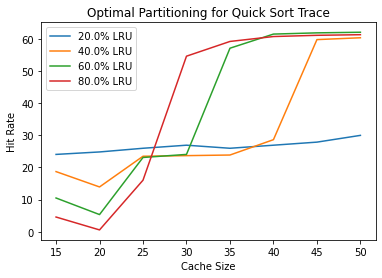

In [7]:
size = [15,20,25,30,35,40,45,50]  #cache size
partition = [ 0.2 ,0.4, 0.6,0.8]  #partition

files = open('sort1','r');
accesses = list_trace(files);   #choose the list_trace and list_dec according to the trace file
#print(len(accesses))

for pt in partition:
  das_hit = []
  for sz in size:
    das_hit.append(DAS(accesses,sz,pt)*100)
  plt.plot(size,das_hit,label = (str)(pt*100) + "% LRU")

plt.legend()
plt.title("Optimal Partitioning for Quick Sort Trace")
plt.xlabel("Cache Size")
plt.ylabel("Hit Rate")
plt.show();